In [1]:
import pandas as pd

df = pd.read_csv('../data/processed/life_expectancy_gdp_co2.csv')
df.head()

,iso3,country_name,year,life_expectancy,gdp_per_capita,co2_per_capita
0,NaN,High income,2024,NaN,41716.075457,0.993
1,NaN,High income,2024,NaN,41716.075457,NaN
2,NaN,High income,2024,NaN,41716.075457,4.868
3,NaN,High income,2024,NaN,41716.075457,NaN
4,NaN,High income,2024,NaN,41716.075457,4.087


In [2]:
#looking at shape and info
print(df.shape)
df.info()

df.head()

(24800, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24800 entries, 0 to 24799
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iso3             13390 non-null  object 
 1   country_name     24800 non-null  object 
 2   year             24800 non-null  int64  
 3   life_expectancy  22150 non-null  float64
 4   gdp_per_capita   19464 non-null  float64
 5   co2_per_capita   18576 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


,iso3,country_name,year,life_expectancy,gdp_per_capita,co2_per_capita
0,NaN,High income,2024,NaN,41716.075457,0.993
1,NaN,High income,2024,NaN,41716.075457,NaN
2,NaN,High income,2024,NaN,41716.075457,4.868
3,NaN,High income,2024,NaN,41716.075457,NaN
4,NaN,High income,2024,NaN,41716.075457,4.087


In [3]:
#looking at nulls
print(df.isna().sum())

df[df['iso3'].isna()]['country_name'].value_counts().head(10)



iso3               11410
country_name           0
year                   0
life_expectancy     2650
gdp_per_capita      5336
co2_per_capita      6224
dtype: int64


country_name
High income            2282
Low income             2282
Lower middle income    2282
Not classified         2282
Upper middle income    2282
Name: count, dtype: int64

Removing the aggregate rows like 'High income' by keeping only rows with a non-null 3 letter iso code. These ISO codes are like keys for the real country name

In [4]:
# keep only rows with a non-missing, 3-letter iso3 code 
#iso code is the country identifyer
df = df[df['iso3'].notna()]
df = df[df['iso3'].str.len() == 3]

print(df.shape)
df['country_name'].head()


(13390, 6)


11410    Afghanistan
11411    Afghanistan
11412    Afghanistan
11413    Afghanistan
11414    Afghanistan
Name: country_name, dtype: object

In [5]:
#Number of values each country has
df['country_name'].value_counts().head(20)


country_name
Afghanistan            65
Albania                65
Algeria                65
Andorra                65
Angola                 65
Antigua and Barbuda    65
Argentina              65
Armenia                65
Aruba                  65
Australia              65
Austria                65
Azerbaijan             65
Bahamas, The           65
Bahrain                65
Bangladesh             65
Barbados               65
Belarus                65
Belgium                65
Belize                 65
Benin                  65
Name: count, dtype: int64

In [6]:
#Checking for duplicates
df.duplicated(subset=['iso3', 'year']).sum()


np.int64(0)

In [7]:
#Seeing which columns still have null values
df.isna().sum()


iso3                  0
country_name          0
year                  0
life_expectancy     240
gdp_per_capita     2361
co2_per_capita      494
dtype: int64

In [8]:
#Trying to find the source of the missing values 
missing_any = df[df[['life_expectancy', 'gdp_per_capita', 'co2_per_capita']].isna().any(axis=1)]
len(missing_any)


2778

In [9]:
#realizing this is by year because they didn't start keeping track of co2 and gdp per capita in some countries until later
df.groupby('year')[['life_expectancy', 'gdp_per_capita', 'co2_per_capita']].apply(
    lambda s: s.isna().sum()
).tail(60)


,life_expectancy,gdp_per_capita,co2_per_capita
year,,,
1965,2,94,15
1966,1,91,15
1967,1,90,15
1968,1,90,15
1969,1,90,15
1970,1,68,14
1971,1,68,13
1972,1,68,12
1973,1,68,12


In [10]:


#Keep only real countries (already discussed earlier)
df = df[df['iso3'].notna()]
df = df[df['iso3'].str.len() == 3]

#Restricting to a "good coverage" window, e.g. 1990–2021
df = df[(df['year'] >= 1990) & (df['year'] <= 2021)]

# 3) Drop rows with missing key variables
df_clean = df.dropna(subset=['life_expectancy', 'gdp_per_capita', 'co2_per_capita'])

print("Original merged rows:", len(pd.read_csv('../data/processed/life_expectancy_gdp_co2.csv')))
print("After country + year filter:", len(df))
print("After dropping NAs:", len(df_clean))

#We want countries that consistently have data through the years so restricting from 1990-2024 makes sense


Original merged rows: 24800
After country + year filter: 6592
After dropping NAs: 6207


In [11]:
#Rechecking the shape and uniqueness
print("Shape:", df_clean.shape)
print("Years:", df_clean['year'].min(), "→", df_clean['year'].max())
print("Countries:", df_clean['iso3'].nunique())

# No duplicate country-year combos?
df_clean.duplicated(subset=['iso3', 'year']).sum()


Shape: (6207, 6)
Years: 1990 → 2021
Countries: 201


np.int64(0)

In [12]:
#Making sure life expectancy and gdp and co2 have reasonable values.
df_clean[['life_expectancy', 'gdp_per_capita', 'co2_per_capita']].describe()


df_clean[df_clean['life_expectancy'] < 20].head()
df_clean[df_clean['life_expectancy'] > 90].head()

df_clean[df_clean['gdp_per_capita'] <= 0].head()
df_clean[df_clean['co2_per_capita'] < 0].head()


,iso3,country_name,year,life_expectancy,gdp_per_capita,co2_per_capita


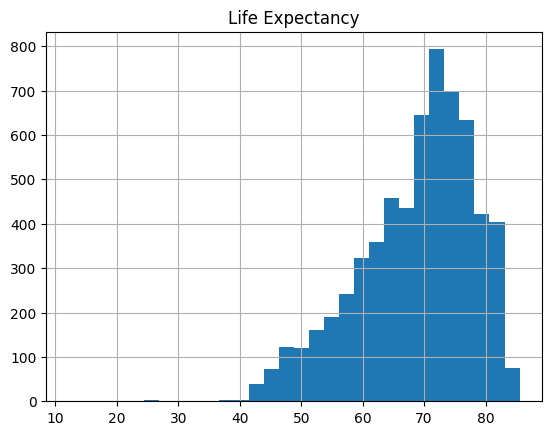

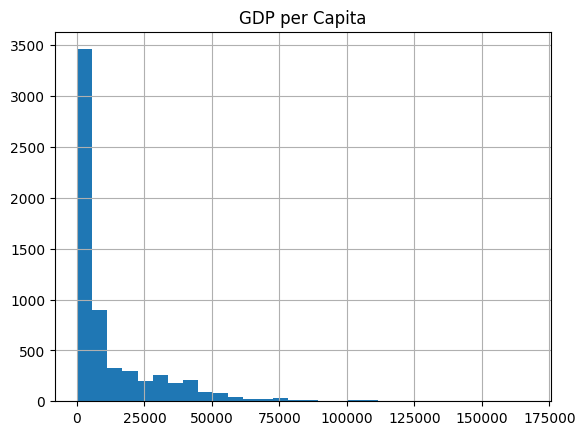

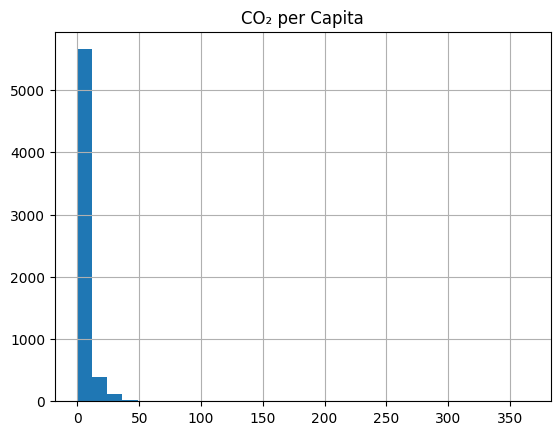

In [13]:
import matplotlib.pyplot as plt

#Checking distributions
df_clean['life_expectancy'].hist(bins=30)
plt.title('Life Expectancy')
plt.show()

df_clean['gdp_per_capita'].hist(bins=30)
plt.title('GDP per Capita')
plt.show()

df_clean['co2_per_capita'].hist(bins=30)
plt.title('CO₂ per Capita')
plt.show()


In [14]:
#Looking for outliars
#creating a final df called df_clean 
df_clean = df_clean.copy()
q_hi_gdp = df_clean['gdp_per_capita'].quantile(0.995)
q_hi_co2 = df_clean['co2_per_capita'].quantile(0.995)

df_clean.loc[:, 'gdp_per_capita'] = df_clean['gdp_per_capita'].clip(upper=q_hi_gdp)
df_clean.loc[:, 'co2_per_capita'] = df_clean['co2_per_capita'].clip(upper=q_hi_co2)
q_hi_gdp, q_hi_co2
df_clean[['gdp_per_capita', 'co2_per_capita']].describe()


,gdp_per_capita,co2_per_capita
count,6207.000000,6207.000000
mean,12561.324122,4.833428
std,17971.940398,6.302594
min,166.710440,0.000000
25%,1484.360822,0.645000
50%,4453.781260,2.445000
75%,16156.388818,6.769500
max,105261.680766,37.567580


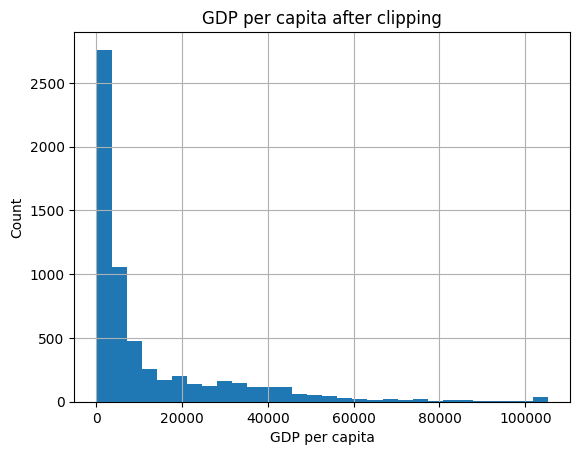

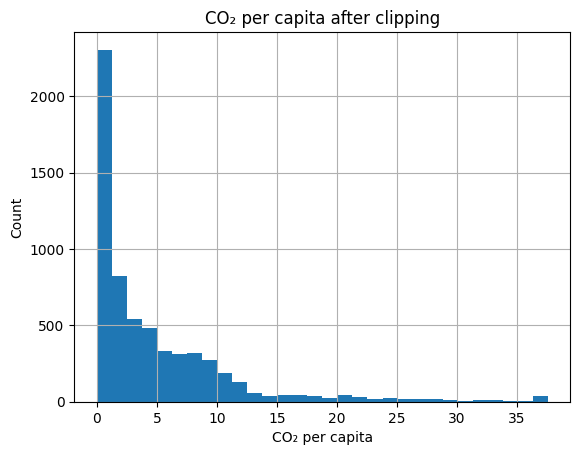

In [15]:


df_clean['gdp_per_capita'].hist(bins=30)
plt.title('GDP per capita after clipping')
plt.xlabel('GDP per capita')
plt.ylabel('Count')
plt.show()

df_clean['co2_per_capita'].hist(bins=30)
plt.title('CO₂ per capita after clipping')
plt.xlabel('CO₂ per capita')
plt.ylabel('Count')
plt.show()


In [16]:
# Final check
print("Final cleaned shape:", df_clean.shape)
print("Years:", df_clean['year'].min(), "to", df_clean['year'].max())
print("Countries:", df_clean['iso3'].nunique())

# Save cleaned dataset
df_clean.to_csv('../data/processed/cleaned_life_expectancy_gdp_co2.csv', index=False)

print("Saved cleaned data to ../data/processed/cleaned_life_expectancy_gdp_co2.csv")


Final cleaned shape: (6207, 6)
Years: 1990 to 2021
Countries: 201
Saved cleaned data to ../data/processed/cleaned_life_expectancy_gdp_co2.csv
